## CSCI-UA 9473 Final Assignment

# Muhammad Wajahat Mirza

In this last assignment, you will get to work on each of the learning frameworks that we introduced throughout the course. The assignement is organized in Three main parts.

- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning 

The Total (final) grade will be computed according to the following rule 



__if__ Mean(Assignment1,Assignment2,Assignment3)< Assignment4 

    
    Total grade = 0.25*Mean(Assignment1+Assignment2+Assignment3) + 0.75*Assignment4
    
__else if__ Mean(Assignment1,Assignment2,Assignment3)> Assignment4 

    
    Total grade = 0.75*Mean(Assignment1+Assignment2+Assignment3) + 0.25*Assignment4
    
    

### Part I. Supervised Learning (25pts)

#### Exercise I.1.1 Regression tree (5pts)

Tree based methods are simple methods that can be used in both regression and classification. The idea is to split the space into regions and then approximate the data by taking the mean of the targets from each region. The approach starts by splitting the space into two regions $R_1$ and $R_2$. Each of the two regions is then itself split into two more regions, $R_{11}$, $R_{12}$ such that $R_{11}\cup R_{12} = R_{1}$ and $R_{21}$, $R_{22}$ such that $R_{21}\cup R_{22} = R_{2}$. By proceeding like this, we end up with a model of the form

$$f(x) = \sum_{m=1}^M c_m I(x\in R_m)$$

where $I(x\in R_m)$ is a function that takes the value $1$ when $x$ belongs to the subregion $R_m$ and $0$ otherwise. 

if we minimize the sum of squares, one can show that the optimal value for the coefficients $c_m$ is the average of the targets from region $R_m$, i.e. 

$$\hat{c}_m = \frac{1}{N_m}\sum_{x_i\in R_m} t_i$$

Now finding the optimal region separation is more tricky. For this reason, the algorithm usually relies on some greedy procedure. 

For a splitting value $s$, Let $R_1(j,s)$ and $R_2(j,s)$ denote the regions we want to get (with respect to the coordinate/feature $j$), i.e. $R_1(j,s) = \left\{\mathbf{x}|x_j\leq s\right\} $ and $R_2(j,s) = \left\{\mathbf{x}|x_j>s\right\}$.

In order to find the optimal value $s$, we solve the following problem

$$\min_{(j,s)} \left[\min_{c_1} \sum_{\mathbf{x}_i\in R_1(j,s)} (t_i - c_1)^2 + \min_{c_2} \sum_{\mathbf{x}_i\in R_2(s,j)} (t_i - c_2)^2\right]\quad (*)$$

As explained before, we can take $c_1$ and $c_2$ to be the averages of the targets from each region. To determine the split, for convenience, we can take it to happen at one of the points from the training set, $\mathbf{s} = \mathbf{x}_i$ for some $i\in \mathcal{D}$. From this computing the optimal splitting for the criterion (*) becomes easier as we are left with computing the value of this criterion for $s = \mathbf{x}_i$ given by any of the points from the training set. And return the value that achieves the minimum.  

Consider the dataset below. Compute the Regression tree for this dataset. You can stop when you reach a certain node size (take it to be $2$ for example)




# Solution

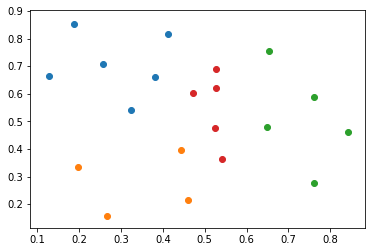

In [84]:
from scipy.io import loadmat
from IPython.display import Image
import numpy as np
Points1 = loadmat('Points1_ExTree.mat')
Points2 = loadmat('Points2_ExTree.mat')
Points3 = loadmat('Points3_ExTree.mat')
Points4 = loadmat('Points4_ExTree.mat')


Points1 = Points1['Points1_ExTree']
Points2 = Points2['Points2_ExTree']
Points3 = Points3['Points3_ExTree']
Points4 = Points4['Points4_ExTree']


import matplotlib.pyplot as plt
plt.scatter(Points1[:,0], Points1[:,1])
plt.scatter(Points2[:,0], Points2[:,1])
plt.scatter(Points3[:,0], Points3[:,1])
plt.scatter(Points4[:,0], Points4[:,1])
plt.show()


target_1 = np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])
target_2 = 2*np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])
target_3 = 5*np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])
target_4 = -3*np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])



In [32]:
print(target_4,"\n",target_3,"\n",target_2,"\n",target_1)

[-3.06078566 -3.00348953 -2.84973993 -3.27311945 -2.944711   -3.15814466] 
 [4.85193184 4.99106153 4.93594135 5.0334893  5.00419679 4.67227466] 
 [1.9477522  1.65020958 2.03152608 2.09412059 2.21778807 2.0539235 ] 
 [0.79640191 1.17655752 0.63067232 0.61260826 1.14049284 0.9689941 ]


## Solution Making the Regression Tree

## Function to Calculate Error Value

In [33]:
def error(data):
    value = 0
    for val in data:
        value = (val - np.mean(data))
        value += value**2
    return value

## Gives Left and Right Nodes of the Tree

In [34]:
def left_right(data, X, val):
    
    left = data[np.nonzero(data[:,X] <= val)[0],: ]
    right = data[np.nonzero(data[:,X] > val)[0],: ]
    
    return left, right

## Breaking Data to Best Split

In [35]:
def data_break(data):
    f = 0
    val = 0
    low = 1
    
    for X in np.arange(2):
        for value in data[:,X]:
            left, right = left_right(data, X, value)
            err = error(left[:,2]) + error(right[:,2])
            
            if err < low:
                f = X
                val = value
                low = err
    
    return f, val

## Making the Tree

In [73]:
def Tree(data):
    tree = {}
    if(np.shape(data)[0] <= 2):
        return data
    
    f, val = data_break(data)
    tree["Feature"] = f
    tree["Val"] = val
    
    left, right = left_right(data, f, val)
    tree["Left"] = Tree(left)
    tree["Right"] = Tree(right)
    
    return tree
    

In [74]:
print(Points1.shape, target_1.shape)
np.reshape

(6, 2) (6,)


<function numpy.reshape(a, newshape, order='C')>

In [75]:
data = np.hstack((Points1, np.reshape(target_1, (6,1))))
print("Data is: \n{}\n\n".format(data))
print("Tree for Sub-data Point 1 and Target 1 is: \n\n{}\n".format(Tree(data)))

Data is: 
[[0.12845622 0.66350365 0.79640191]
 [0.18836406 0.85328467 1.17655752]
 [0.41186636 0.81824818 0.63067232]
 [0.25748848 0.71021898 0.61260826]
 [0.32430876 0.54087591 1.14049284]
 [0.38191244 0.66058394 0.9689941 ]]


Tree for Sub-data Point 1 and Target 1 is: 

{'Feature': 1, 'Val': 0.6605839416058396, 'Left': array([[0.32430876, 0.54087591, 1.14049284],
       [0.38191244, 0.66058394, 0.9689941 ]]), 'Right': {'Feature': 1, 'Val': 0.7102189781021898, 'Left': array([[0.12845622, 0.66350365, 0.79640191],
       [0.25748848, 0.71021898, 0.61260826]]), 'Right': array([[0.18836406, 0.85328467, 1.17655752],
       [0.41186636, 0.81824818, 0.63067232]])}}



#### Exercise I.1.2. Weakest link (5pts)

Once we have built a sufficiently deep tree, we are left with determining whether one cannot reduce the depth of this tree (i.e. how coarse the model can be while still achieving sufficient accuracy). A (too) fine model will obviously lead to overfitting. For any tree, we define the set of leaf nodes (i.e. final set of regions) as $M$. We will use this parameter to encode the complexity of the tree. 

We can define the error that we make with a particular tree by considering the error on each region and summing those error terms across each region. If we let $R_m$ to denote the (average) error induced by region $R_m$, 

$$Q_m(T) = \frac{1}{N_m} \sum_{x_i\in R_m} (t_i - \hat{c}_m)^2$$

To account for the complexity of the tree, one can also extend this cost into a loss $\ell(T)$ which penalize complex trees (with a large number of leaf nodes $M$) as

$$\ell(T) = \sum_{m=1}^M N_m Q_m(T) + \alpha M$$

We can then look for the optimal tree for any particular value of $\alpha$. 

The search for the optimal $\alpha$ and the associated tree is usually done through a procedure known as _weakest link prunning_ which works as follows 

For any node other than the leaf nodes, we can study how much of an improvement one can get by deleting the subtree located below the node. To do this, we proceed as follows. For any given subtree, we can define the costs $\tilde{R}(t) = Q(t) + \alpha$ and $R(T_t) = Q(T_t) + \alpha|T_t|$. The first one is the cost of the node $t$ (that is the contribution if we removed the whole subtree below $t$) and the second one is the contribution of the term if we were to keep all the leaf of the subtree. For each node in $T_0$, we can look for the $\alpha$ at which $R(T_t)>R(t)$. In other words, we look for the value $\alpha$ such that 

$$Q(t) + \alpha < Q(T_t) + \alpha|T_t|$$

This is equivalent to looking for the  $\alpha$ such that $\alpha>\frac{Q(t)-Q(T_t)}{|T_t|-t}$. We can do this for every node $t$. The _weakest link_ $t'$ is then the connection for which the $\alpha(t')$ is the smallest. If there are multiple nodes achieving the same minimum we remove all the sub-branches associated to those nodes. We define the next subtree by removing the sub-branches for _Weakest link_ $t'$. Let us denote that subtree as $T'$. We then repeat the procedure on $T'$, looking for the nodes with smallest $\alpha$. The procedure generates a sequence of subtrees $T, T', T''$ with associated values $\alpha_0, \alpha_1, \ldots$. 

Implement _weakest link prunning_ below. 

In [4]:
import numpy as np

'''Could NOT solve'''


#### Exercise I.1.3. Cross validation (5pts)

Given the sequence of subtrees $T_0,T_1, T_2,\ldots$ and its accompanying sequence of weights $\alpha_0,\alpha_1,\ldots$, one can show that the sequence contains the optimal $\alpha^*$. To find this $\alpha^*$, one can use $k$-fold cross validation. 

Divide the dataset into $K$ bins of size $N/K$. For each of those bins, we will use one bin as our validation/test set and the remaining $K-1$ bins as our training set. 

1- Using the training set, compute the tree for each of the values of $\alpha$ obtained above. You don't need to optimize anything as the value on a region is defined as the average of the targets in this region and the number of levels can be set by only retaining those subtrees for which $R_\alpha(t)>R_{\alpha}(T_t)$

2-Once you have computed all the subtrees, evaluate the prediction error for those subtrees on the set consisting of the remaining $K$ points. The prediction error is just the average target ($c_m$) from the region in which the new points is located minus the true target of this point.

And compute the average error as 

$$E(\alpha) = \frac{1}{N}\sum_{i=1}^N (\text{prediction}_{T_k(\alpha)}(\mathbf{x}_i) - t_i)^2$$

where $N$ is the total number of points in the dataset and $\text{prediction}_{T_k}$ is the prediction obtained on the tree $T_k(\alpha)$ learned on the set of $N - K$ points to which $\mathbf{x}_i$ did not belong (i.e. learned without $\mathbf{x}_i$)


Select the $\alpha$ which gives the smallest error.

Take $k$ between $2$ and $4$ and find the optimal $\alpha$. 

In [5]:
# put your code here

'''Could Not Solve'''

#### Exercise I.2. Bias-Variance (10pts)

In this exercise, we will study the decomposition of the prediction error into the bias and variance contribution for a simple regression model. For a given learning model, the prediction error can read as

$$\mathbb{E}\left\{(f(\mathbf{x},\theta)) - t(\mathbf{x}))^2\right\}$$

After some calculation, this expression can reduce to

$$\mathbb{E}_D\left\{(f_D(\mathbf{x},\theta)) - t(\mathbf{x}))^2\right\} = \left(\mathbb{E}\left\{f_d(\mathbf{x}, \theta)\right\} - t(\mathbf{x})\right)^2 + \mathbb{E}_D\left\{\left(f_D(\mathbf{x}; \theta) - \mathbb{E}_D\left\{f_D(\mathbf{x}, \theta)\right\}\right)^2\right\}$$

In this expression, the first term represents the squared bias (that is how much the choice of the family of models we pick differs is able to capture of the measurements we have on average). In the second term, you can recognize the expression of the variance. This second term captures how much the models vary within a particular family of models when we change the subset $D$ on which we learn the models. 


In this exercise, we will illustrate this decomposition. for a simple regression model on noisy degree $3$ datasets with model of degrees from $0$ to $5$

Consider the noisy dataset below. For the sake of the exercise, we will not change the dataset each time when computing the average, but rather just generate new points by changing the noise. 

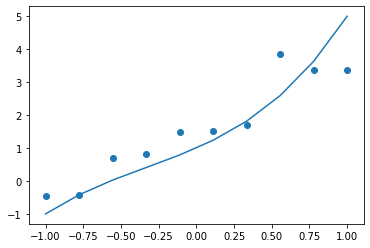

In [76]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,10)
y = x**3 + x**2 + 2*x + 1

numTest = 400

ynoisy = y +np.random.normal(0,.6,len(x))

plt.scatter(x, ynoisy)
plt.plot(x, y)
plt.show()

To represent the three terms (bias, variance and Mean Squared Error) code the following steps 

__1.__ We will write two nested loops. The first one on the maximum degree of the regression model. The second one on the number of experiments. For each experiments we will generate new points as we did above but with a different noise vector. That is re-use a line of the form ynoisy = y +np.random.normal(0,.6,len(x)) for each XP   


__2.__ In each experiment, for each maximum degree of the regression model (0,1,..5), generate the polynomial features up to this degree and learn the regression model on the noisy points with the LinearRegression function from scikit (just use the plain simple synthax : LinearRegression(), no need for any argument and fit the model to the noisy points)


__3.__ For each experiment keep track of the models you learn by using the points xprediction below and computing the prediction of the model at those points. Store those predictions in a matrix of size num_MaxDegree x numXP


__4.__ Compute each of the three terms (bias, variance and Mean squared error = Bias + variance) by using the expressions given above. 


__5.__ plot the results

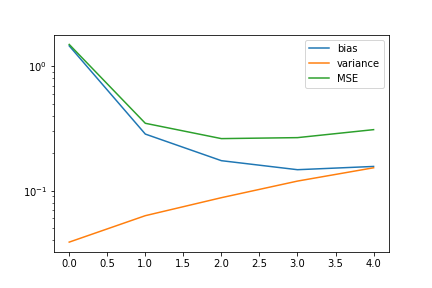

In [83]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,10)
y = x**3 + x**2 + 2*x + 1

maxDegree = 5
numTest = 400

from sklearn.linear_model import LinearRegression


xprediction = np.linspace(-1,1,100)
                
    
averagePrediction = np.zeros((len(xprediction),maxDegree))  
true = np.zeros((len(xprediction),maxDegree))  
variance = np.zeros((len(xprediction),maxDegree))  
bias = np.zeros((len(xprediction),maxDegree))  

    
for dmax in np.arange(0,maxDegree):

    ynoisy = np.zeros((len(x),numTest))
    predictionTesti = np.zeros((len(xprediction),numTest))

    clf = LinearRegression()

    for testi in np.arange(0,numTest):

        ynoisy[:,testi] = y +np.random.normal(0,.6,len(x))
        
        '''put your code here. Generate the polynomial features up to degree dmax and fit the clf model'''
        total_degree = np.arange(0,dmax+1)+1
     
        X = np.power(x.reshape(-1, 1), total_degree)
        
        clf.fit(X, ynoisy)
        
        xnew = np.linspace(-1,1,len(xprediction))
        X_pred = np.power(xnew.reshape(-1,1),total_degree )
        target_predicted = clf.predict(X_pred)
        
        predictionTesti[:,testi] = target_predicted[:,testi] # fill in the matrix with the predictions from each model
        
    avgerage = predictionTesti.mean(axis =1)
    avgerage = avgerage.reshape(-1,)
    averagePrediction[:,dmax] = avgerage # Compute the average prediction across the XPs
    
    
    center_Pred = predictionTesti - np.expand_dims(averagePrediction[:,dmax],axis=1)
    varriance_avg = center_Pred.mean(axis=1)    
    variance[:,dmax] = varriance_avg # Compute the variance by averaging over the XP (see expression above)
    
    clf = LinearRegression()
    X = np.power(x.reshape(-1,1),total_degree)
    clf.fit(X,y)
    
    xnew = np.linspace(-1,1,len(xprediction))
    X_pred = np.power(xnew.reshape(-1,1), total_degree)
    tru = clf.predict(X_pred)
    true[:,dmax] =  tru # compute the prediction from the noiselss model to get the targets of the points in xprediction
    
    avgtru = true.mean(axis=1)
    bias[:,dmax] = avgtru # Compute the bias by averaging over the XP (see expression above)

'''plot the result using the lines below'''        

plt.semilogy(np.arange(0,maxDegree), np.mean(bias,axis=0), label='bias')
plt.semilogy(np.arange(0,maxDegree), np.mean(variance,axis=0), label = 'variance')
plt.semilogy(np.arange(0,maxDegree), np.mean(bias,axis=0).reshape(-1,1) + np.mean(variance,axis=0).reshape(-1,1), label = 'MSE')

plt.legend() 

plt.show

## End of Code for Supervised Section